# Итерационный метод Ричардсона

Простейшая идея:
$$Ax = b$$
$$Ax - b = 0 \mid \tau$$
$$x - 0 = x$$
$$x - \tau(Ax - b) = x$$
А тепеть расставим индексы
$$x_{k + 1} = x_k - \tau(Ax_k - b)$$

# Метод простой итерации
$$x_{k + 1} = Bx_k + F$$

- Когда такой метод будет сходиться к истиному решению $x^*$?
- Если метод сходится будет ли он сходится к решению $x^*$?

Пусть последовательность $\{x_k\}_{k = 1}^{\infty}$ сходится к $x^*$, тогда можно записать следующее

$$x^* = Bx^* + F$$

Рассмотрим вопрос сходимости:

$$x_{k + 1} - x^* = B(x_k - x^*)$$

**Можно увидеть достаточное условие сходимоси:** $\|B\| < 1$, для какой-то нормы

$$\|x_{k + 1} - x^*\| = \|B(x_k - x^*)\| \leq \|B\|\|x_k - x^*\| \leq \cdot \leq \|B\|^{k + 1}\|x_0 - x^*\|$$

Получили геометрическую прогрессию со знаменателем $\|B\| < 1$, следовательно сходимость линейная со скоростью $q = \|B\| < 1$

**Необходимое и достаточное условие:**
$$|\lambda(B)| < 1, \quad \lambda \in \mathbb{C}$$
Для эрмитовой матрицы:
$$\|B\|_2 = \max|\lambda(B)|$$

# Метод Ричардсона, сходимость

То, что было записано ранее эквивалентно
$$x_{k + 1} = (I - \tau A)x_k + \tau b$$
То есть надо надо исследовать спектр матрицы $I - \tau A$
$$\lambda(I - \tau A) = 1 - \tau\lambda(A)$$
$$|1 - \tau\lambda(A)| < 1$$
Спектр должен лежать в круне радиуса $1/\tau$ с центром $1/\tau$.

Рассмотрим эрмитову положительно определенную матрицу $A = A^* > 0$, тогда $\lambda(A) \in [\lambda_{\min}, \lambda_{\max}]$

Для сходимости надо $0 < \tau < \frac{2}{\lambda_{\max}}$

## Оптимальный шаг
Собственные числа матрицы метода $B$ будут лежать на отрезке $[1 - \tau \lambda_{\min}, 1 - \tau \lambda_{\max}]$, тогда
$$q = \max\{|1 - \tau \lambda_{\min}|, |1 - \tau \lambda_{\max}|\}$$

- Когда mинимально возможное значение $q$?

$$|1 - \tau \lambda_{\min}| = |1 - \tau \lambda_{\max}|$$
$$1 - \tau \lambda_{\min} = \tau \lambda_{\max} - 1$$
$$\tau_{opt} = \frac{1}{\lambda_{\min} + \lambda_{\max}} \quad q_{opt} = \frac{\lambda_{\max} - \lambda_{\min}}{\lambda_{\min} + \lambda_{\max}}$$

То есть для этого нам нужно знать границы спектра -- степенной метод.

Maximum eigenvalue = 3.682507065662361, minimum eigenvalue = 0.08101405277100529
Condition number = 45.45516413147918


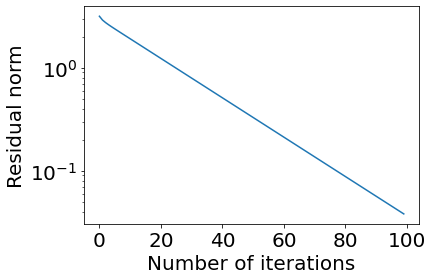

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
import scipy.sparse
import scipy.sparse.linalg as spla
import scipy
from scipy.sparse import csc_matrix

n = 10
ex = np.ones(n);
A = sp.sparse.spdiags(np.vstack((-ex,  2*ex, -ex)), [-1, 0, 1], n, n, 'csr'); 
rhs = np.ones(n)
ev1, vec = spla.eigsh(A, k=2, which='LA')
ev2, vec = spla.eigsh(A, k=2, which='SA')
lam_max = ev1[0]
lam_min = ev2[0]

tau_opt = 2.0/(lam_max + lam_min)


niters = 100
x = np.zeros(n)
res_richardson = []
for i in range(niters):
    rr = A.dot(x) - rhs
    x = x - tau_opt * rr
    res_richardson.append(np.linalg.norm(rr))
#Convergence of an ordinary Richardson (with optimal parameter)
#print(res_richardson)
plt.plot(res_richardson)
plt.yscale('log')
plt.xlabel("Number of iterations", fontsize=20)
plt.ylabel("Residual norm", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
print("Maximum eigenvalue = {}, minimum eigenvalue = {}".format(lam_max, lam_min))
print("Condition number = {}".format(lam_max.real / lam_min.real))

Из-за числа обусловленности сходится очень медленно.

- Что бы улучшить обусловленность матрицы используется предобуславлеватели


случай неэрмитовой матрицы:

- Может сходиться
- Может расходиться
- Может почти быть на месте

In [2]:
# B = np.random.randn(2, 2)
B = np.array([[1, 2], [-1, 0]])
# B = np.array([[0, 1], [-1, 0]])
x_true = np.zeros(2)
f = B.dot(x_true)
eigvals = np.linalg.eigvals(B)
print("Spectrum of the matrix = {}".format(eigvals))

# Run Richardson iteration
x = np.array([0, -1])
tau = 1e-2
conv_x = [x]
r = B.dot(x) - f
conv_r = [np.linalg.norm(r)]
num_iter = 1000
for i in range(num_iter):
    x = x - tau * r
    conv_x.append(x)
    r = B.dot(x) - f
    conv_r.append(np.linalg.norm(r))

Spectrum of the matrix = [0.5+1.32287566j 0.5-1.32287566j]


Text(0, 0.5, 'Residual norm')

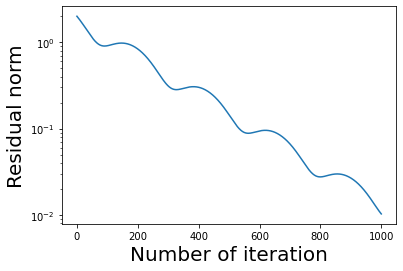

In [3]:
plt.semilogy(conv_r)
plt.xlabel("Number of iteration", fontsize=20)
plt.ylabel("Residual norm", fontsize=20)

# Метод спуска

Теперь рассмотрим шаг, меняющийся во от итерации к итерации $\tau_k$

$$x_{k + 1} = x_k - \tau_k(Ax_k - b)$$

Этот парметр можно находить на каждом шагу, минимизируя норму невязки. (Вспомните об этом на методах оптимизации в следующем семестре)

$$e_{k + 1} = x_{k + 1} - x^*$$
$$e_{k + 1} = (I - \tau_kA)r_k = \ldots = p(A)e_0$$
$$p(A) = (I - \tau_kA)(I - \tau_{k - 1}A) \ldots (I - \tau_0A)$$
Это матричный многочлен. Тогда
$$\|e_{k + 1}\| \leq \|p(A)\|\|e_0\|$$
надо минимизировать $\|p(A)\|_2$, $A = U\Lambda U^*$
$$\|p(A)\|_2 = \|Up(\Lambda)U^*\| = \|p(\Lambda)\| = \max_i|p(\lambda_i)| \leq \max_{\lambda}|p(\lambda)|$$

Следовательно мы хотим найти такой полином, что $p(0) = 1$ и наименьшего отклонения от 0 на $[\lambda_{\min}, \lambda_{\max}]$, мы можем заменой переменных перейти к интервалу $[-1, 1]$

Это получается используя полиномы Чебышева (вывод разбираться не будет):
$$\cos(n \arccos x)$$

Следовательно $1/\tau_k$ -- корень этого многочлена

$$\tau_i = \frac{2}{\lambda_{\max} + \lambda_{\min} - (\lambda_{\max} - \lambda_{\min})x_i}$$
$$x_k = \cos\frac{\pi(2i + 1)}{2n}, \quad i = 0, \ldots, n - 1$$
Тогда сходимость будет линейной со скоростью
$$q = \frac{\sqrt{cond(A)} - 1}{\sqrt{cond(A)} + 1}$$
что гораздо лучше чем с постоянным шагом.

Text(0.5, 1.0, 'Interval $x\\in[-1.1, 1.1]$')

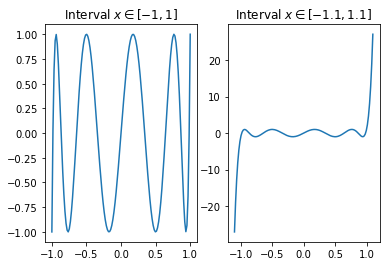

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x1 = np.linspace(-1, 1, 128)
x2 = np.linspace(-1.1, 1.1, 128)
p = np.polynomial.Chebyshev((0, 0, 0, 0, 0, 0, 0, 0, 0, 1), (-1, 1)) #These are Chebyshev series, a proto of "chebfun system" in MATLAB
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x1, p(x1))
ax1.set_title('Interval $x\in[-1, 1]$')
ax2.plot(x2, p(x2))
ax2.set_title('Interval $x\in[-1.1, 1.1]$')

- Выше мы предполагали, что спектр действителен и заключен а одном интервале, если же в двух, то многочлены Золотарева решат проблему
-Для большего числа интервалов наилучший многочлен может быть выражен используя гиперболические функции

# Связь с обыкновенными дифференциальными уравнениями

$$\frac{dy}{dt} + Ay = f, \quad y(0) = y_0$$

Тогда численное решение будет записано в виде схемы:
$$\frac{y_{k + 1} - y_k}{\tau} = -Ay_k + f$$
$$y_{k + 1} = y_k - \tau(Ay_k - f)$$

# Метод Якоби
А что если разбить систему по-другому?

$$Ax = b \Rightarrow Dx + (A - D)x = b$$
где $D$ -- диагоняль матрицы $A$, тогда
$$Dx = b + (D - A)x$$
$$Dx_{k + 1} = b + (D - A)x_k$$
Или
$$x_{k + 1} = x_k + D^{-1}(b - Ax_k)$$

Такой метод сходится для матриц с диагоняльным преобладанием, т.е. элемент на диагонале больше по модулю суммы всех остальных
$$B = I - D^{-1}A$$
Тут будут нули на диагонале
$$\|B\|_{\infty} = \max_i\sum\limits_{i \neq j}\frac{|a_{ij}|}{|a_{ii}|} = \max_i\frac{1}{|a_{ii}|}\sum\limits_{i \neq j}|a_{ij}| < 1$$

Необходимое и достаточное условие $\max|\lambda(B)| < 1$
$$\det(B - \lambda I) = \det(I - D^{-1}A - \lambda I) = -\det D^{-1}\det(A - B - \lambda D) = 0$$

# Метод Зейделя
$$(L + D + U)x = b$$
$$(L + D )x_{k + 1} = b - Ux_k$$
Нужно на каждом шагу решать систему с треугольной матрицей
$$x_{k + 1} = x_k + (L + D)^{-1}(b - Ax_k)$$

# SOR
Модификация метода Зейделя с параметром релаксации $\omega \in (0, 2)$
$$(L + 1/\omega D)x_{k + 1} = b - (U + \frac{\omega - 1}{\omega}D)x_k$$
$$x_{k + 1} = x_k + (L + 1/\omega D)^{-1}r_k$$

Данный метод сходится для эрмитовых положительно определенный, но подбор оптимального параметра -- непрстая задача.